**Improving Computer Vision Accuracy using Convolutions**

---

In the previous lessons you saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with the impact of different sizes of hidden layer, number of training epochs etc on the final accuracy.

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [0]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give us two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


3
[[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194 102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179 186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117 127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119 127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 110 102 112 100 121 117 129 

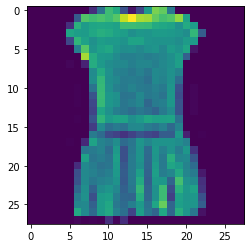

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[3])
print(training_labels[3])
print(training_images[3])

In [0]:
#Normalize the data
#training_images  = training_images / 255.0
#test_images = test_images / 255.0

#For Convolution process
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [0]:
#Starting model layers
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), #Starting with a Flatten Layer
#                                     tf.keras.layers.Dense(128, activation=tf.nn.relu), 
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
#Using Convolution
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
#Compiling the model
model.compile(optimizer = tf.optimizers.Adam(), #Using Adam Optimizer
              loss = 'sparse_categorical_crossentropy', #As we are dealing with 10 classes of objects, we use sparse_categorical_crossentropy
              metrics=['accuracy'])  #Accuracy measure

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [10]:
#Fitting the model on training images and labels
model.fit(training_images, training_labels, epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4383 - accuracy: 0.8418
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2918 - accuracy: 0.8927
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2476 - accuracy: 0.9080
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2156 - accuracy: 0.9193
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1879 - accuracy: 0.9306
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1665 - accuracy: 0.9381
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1442 - accuracy: 0.9460
Epoch 8/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1278 - accuracy: 0.9520
Epoch 9/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1115 - accuracy: 0.9577
Epoch 10/30
1875/1875 [==============================] - 11s 6ms/step - l

In [11]:
#Evaluating the model using test images
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy:{test_acc*100}')

313/313 [==============================] - 1s 4ms/step - loss: 0.7100 - accuracy: 0.9134
Test Accuracy:91.33999943733215


In [12]:
classification = model.predict(test_images)
print(classification[0])

[9.4231900e-26 4.3284839e-23 5.1401480e-21 8.9215063e-23 6.3629952e-28 2.7374511e-14 1.1918771e-30 2.8371417e-15 3.3894270e-23 1.0000000e+00]


The above output is a list of 10 probabilities...

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  """
    It is the class to stop the training when a certain condition met
  """
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [14]:
callbacks = myCallback()

model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.0247 - accuracy: 0.9913
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0247 - accuracy: 0.9913


# Visualizing the Convolutions and Pooling

Below code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and we'll begin to see common features between them. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [18]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4
 2]


In [17]:
#Checking how we can get layers...
for layer in model.layers:
  print(layer.output)

Tensor("conv2d/Identity:0", shape=(None, 26, 26, 64), dtype=float32)
Tensor("max_pooling2d/Identity:0", shape=(None, 13, 13, 64), dtype=float32)
Tensor("conv2d_1/Identity:0", shape=(None, 11, 11, 64), dtype=float32)
Tensor("max_pooling2d_1/Identity:0", shape=(None, 5, 5, 64), dtype=float32)
Tensor("flatten/Identity:0", shape=(None, 1600), dtype=float32)
Tensor("dense/Identity:0", shape=(None, 128), dtype=float32)
Tensor("dense_1/Identity:0", shape=(None, 10), dtype=float32)
